# Glass Identification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data preprocessing

In [2]:
df=pd.read_csv("glass.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.drop(0,axis=1, inplace=True)

In [4]:
df.head(1)

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [5]:
df=df.rename(columns={1:'RI',2:'Na',3:'Mg',4:'Al',5:'Si',6:'K',7:'Ca',8:'Ba',9:'Fe',10:'target'})

In [6]:
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   target  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df.nunique()

RI        178
Na        142
Mg         94
Al        118
Si        133
K          65
Ca        143
Ba         34
Fe         32
target      6
dtype: int64

In [9]:
df['target'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
df['target']=df['target'].replace({1:1,2:1,3:1,4:1,5:0,6:0,7:0})

In [11]:
df['target'].unique()

array([1, 0], dtype=int64)

In [12]:
df.duplicated().value_counts()

False    213
True       1
Name: count, dtype: int64

In [13]:
dup=df[df.duplicated()]
print( 'the duplicated row is ')
dup

the duplicated row is 


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1.0


In [16]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,0.315968,0.402118,0.596704,0.361210,0.508048,0.080334,0.327517,0.055831,0.112308,0.760563
std,0.133142,0.122806,0.321535,0.154494,0.138214,0.105183,0.132517,0.158173,0.191352,0.427745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235733,0.326316,0.465479,0.280374,0.441071,0.020934,0.261152,0.000000,0.000000,1.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.090177,0.294610,0.000000,0.000000,1.000000
75%,0.351185,0.463158,0.801782,0.417445,0.585714,0.098229,0.345725,0.000000,0.196078,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


EDA

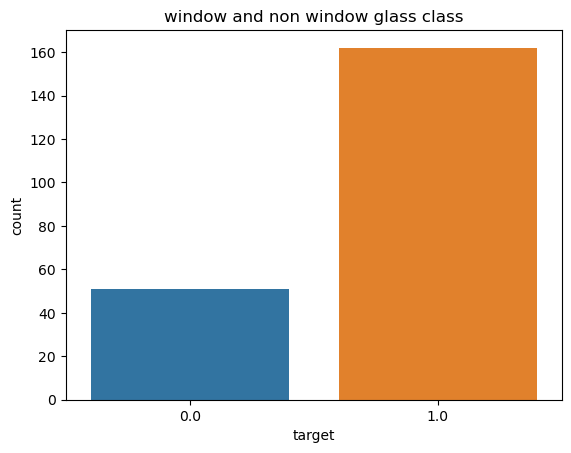

In [17]:
sns.countplot(x='target',data=df)
plt.title('window and non window glass class')
plt.show()

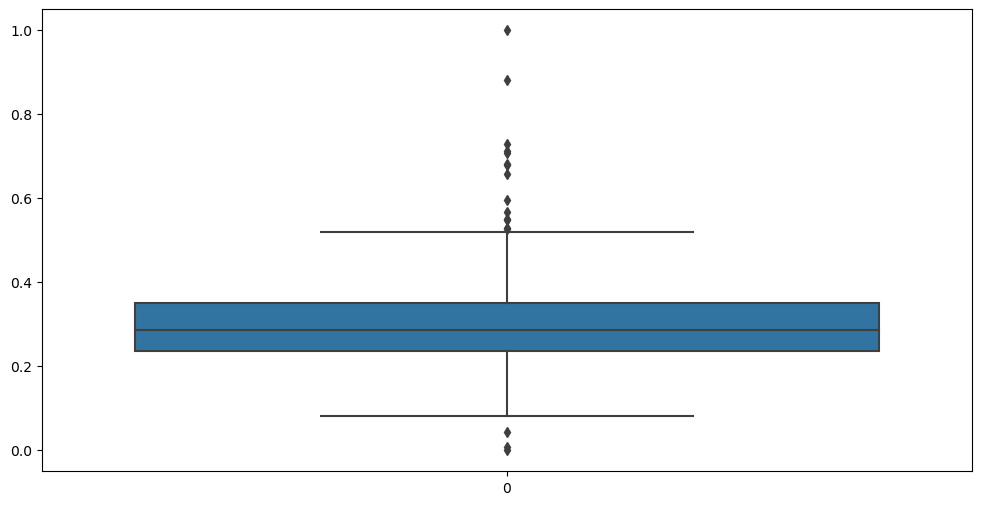

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df['RI'])
plt.show()

In [19]:
ul=df['RI'].mean()+2.5*df['RI'].std()
ll=df['RI'].mean()-2.5*df['RI'].std()
print(ul)
print(ll)

0.6488218020327715
-0.016886202482888968


In [20]:
new=df.loc[(df['RI']<ul) & (df['RI']>ll)]
print('new',len(new))
print('old',len(df))

new 205
old 213


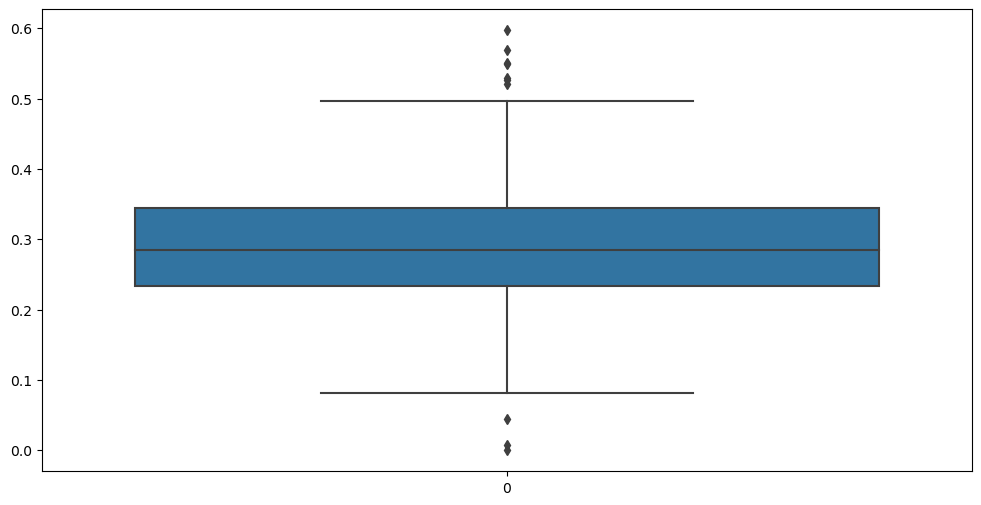

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new['RI'])
plt.show()

In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,0.879840,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301,0.561084
1,0.243816,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301,0.561084
2,0.716412,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301,0.561084
3,0.227291,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301,0.561084
4,0.306608,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301,0.561084


In [23]:
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [24]:
df.shape

(213, 10)

In [25]:
df1=df[(z<3).all(axis=1)]

In [26]:
df1.shape

(193, 10)

In [27]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  9.389671361502346


In [28]:
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df2=df[~((df<(q1-3*iqr)) | (df>(q3+3*iqr))).any(axis=1)]

In [29]:
df2.shape

(145, 10)

In [30]:
df=df1

In [31]:
df['target'].value_counts()

target
1.0    153
0.0     40
Name: count, dtype: int64

<Axes: >

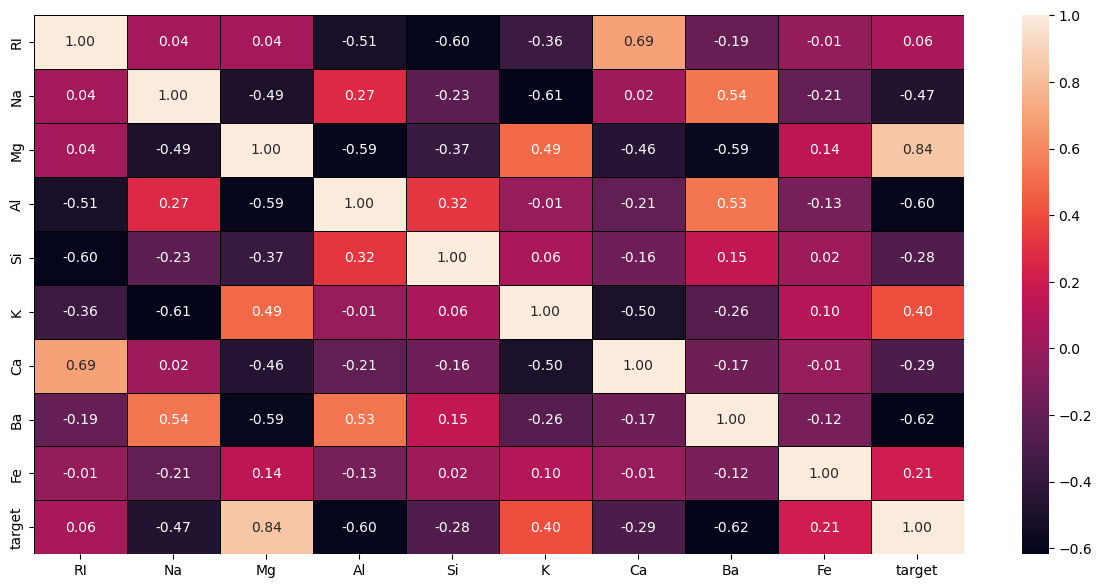

In [32]:
plt.figure(figsize =(15,7))
sns.heatmap(df.corr(),annot = True ,linewidths = 0.5,linecolor = 'black' , fmt = '.2f')

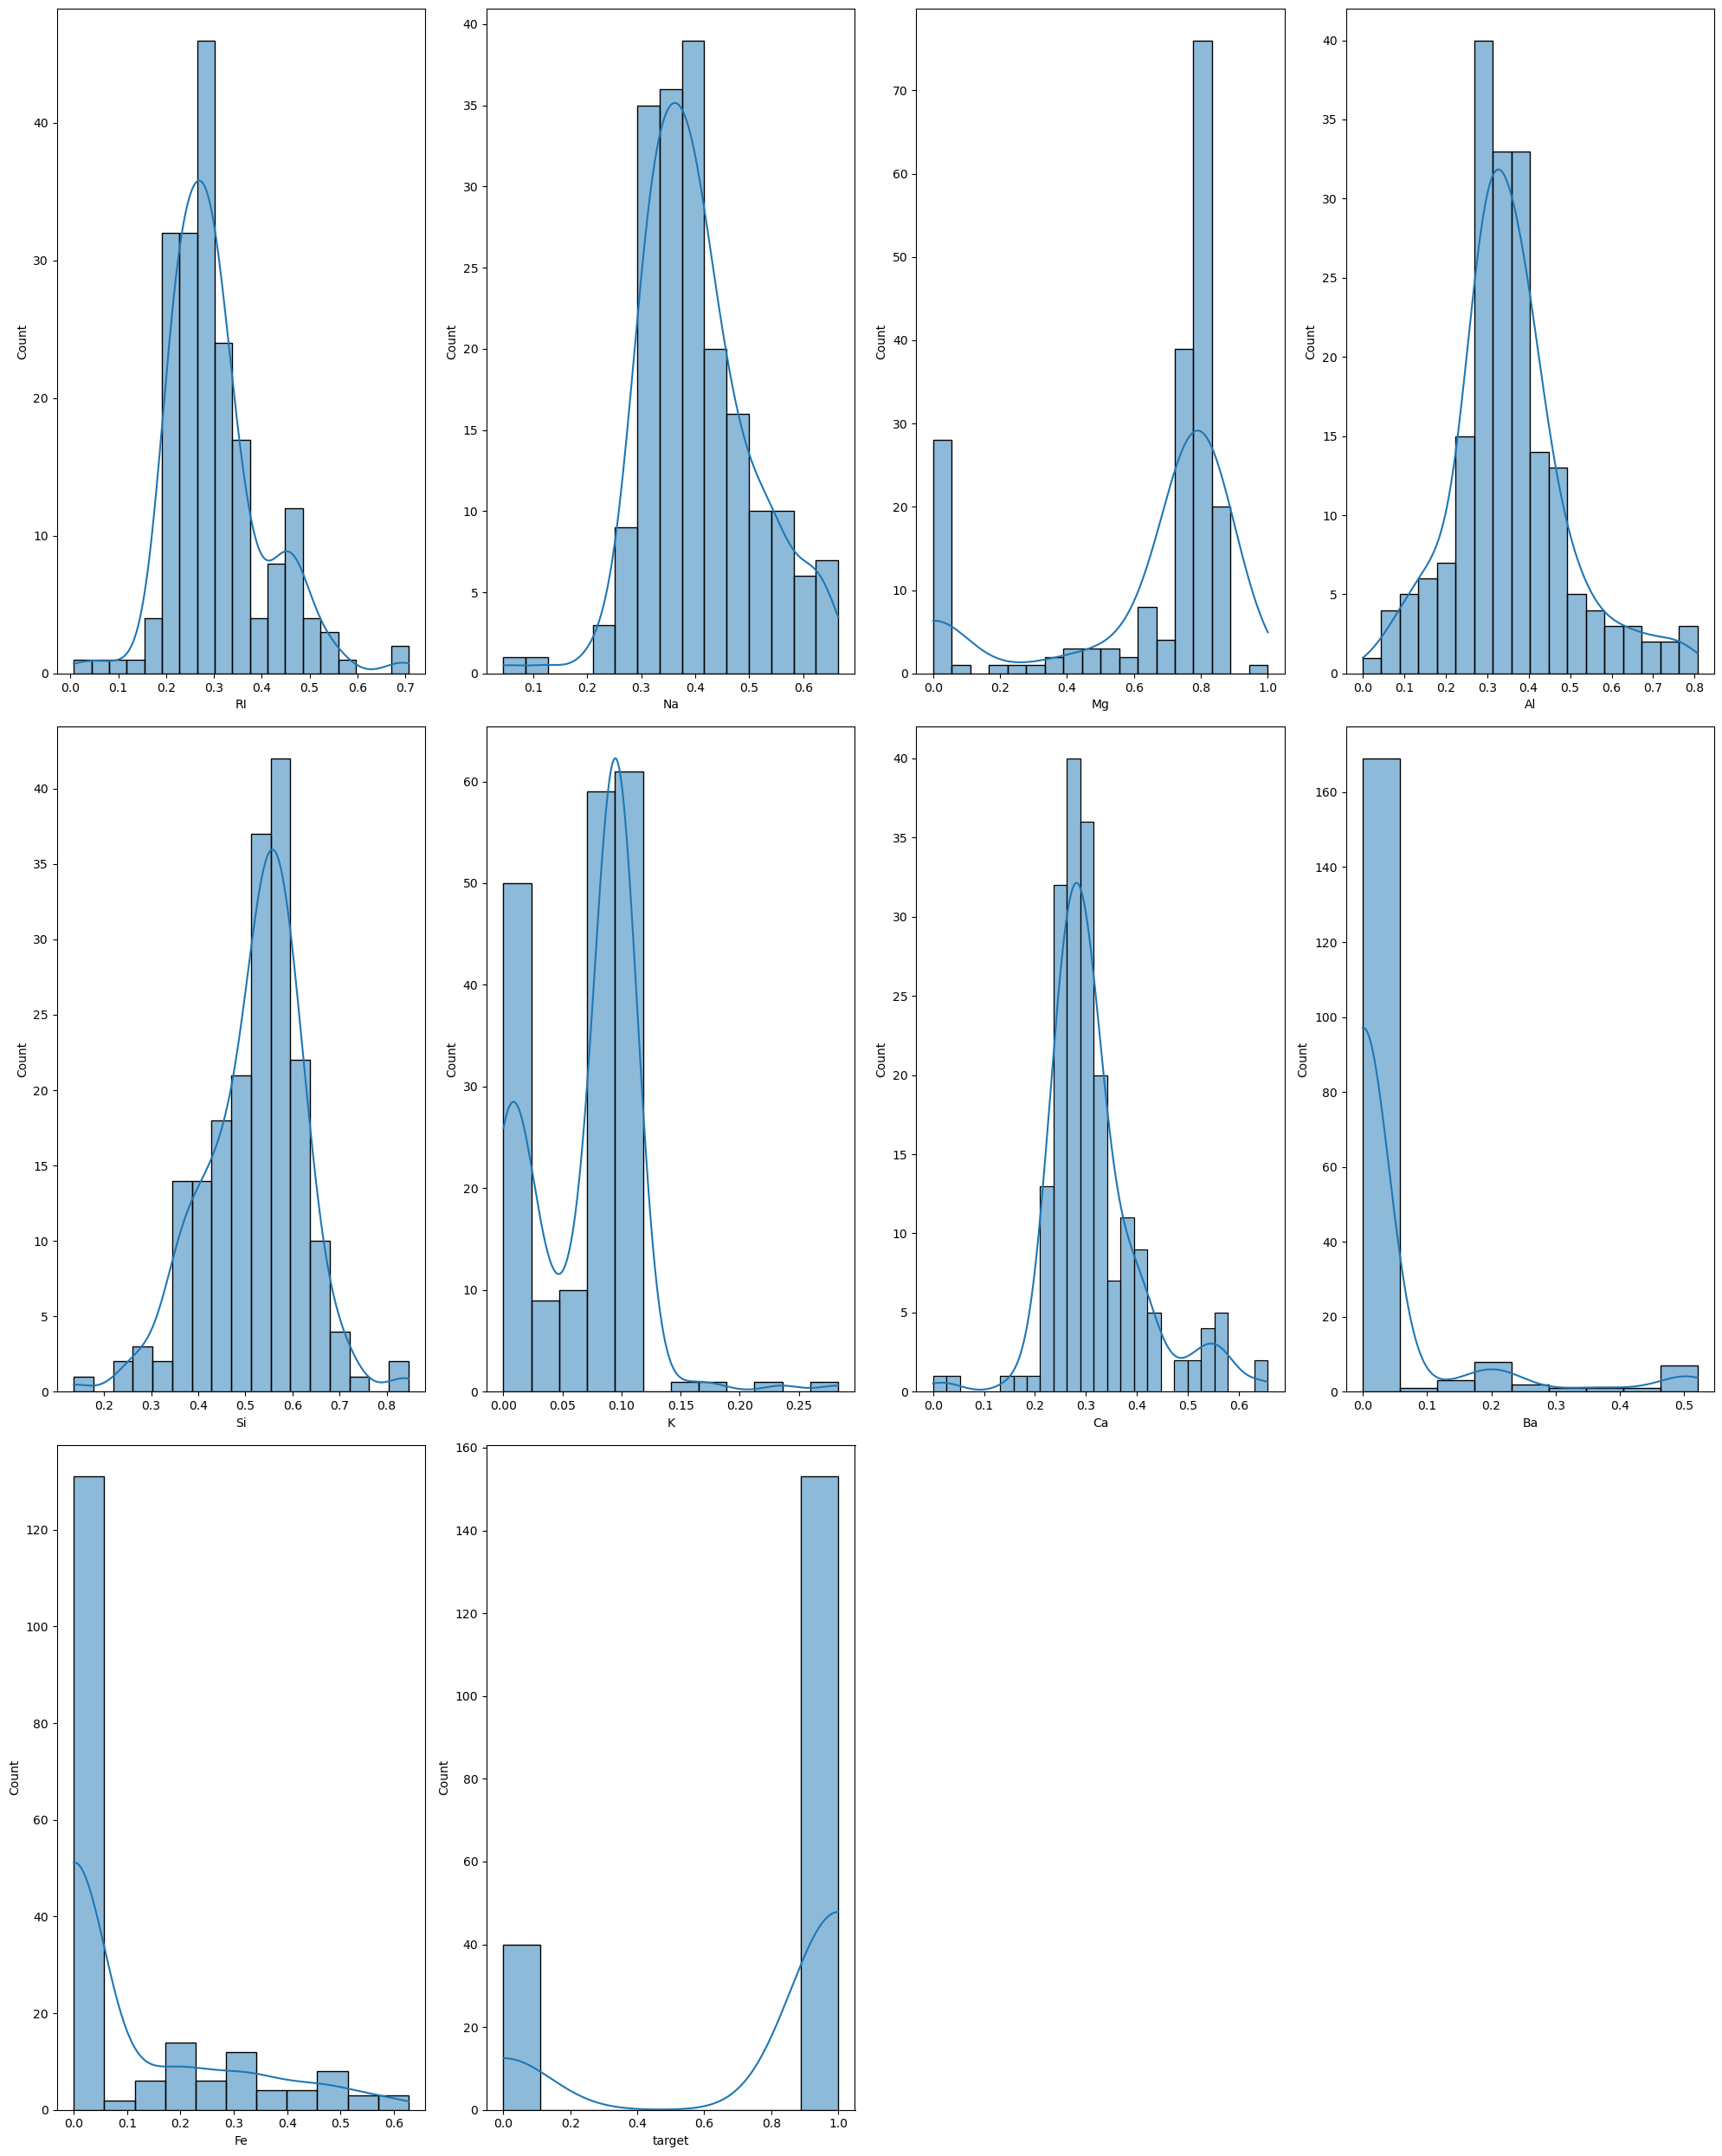

In [33]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(3,4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show() 

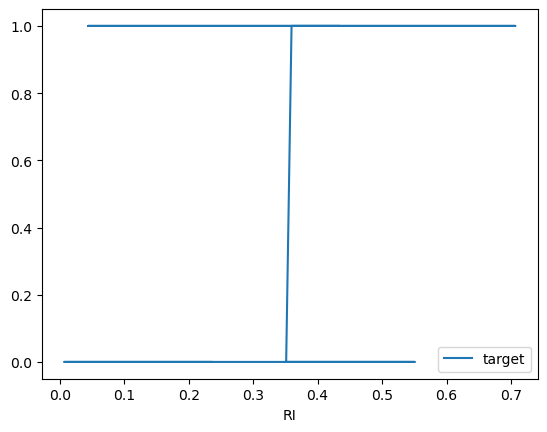

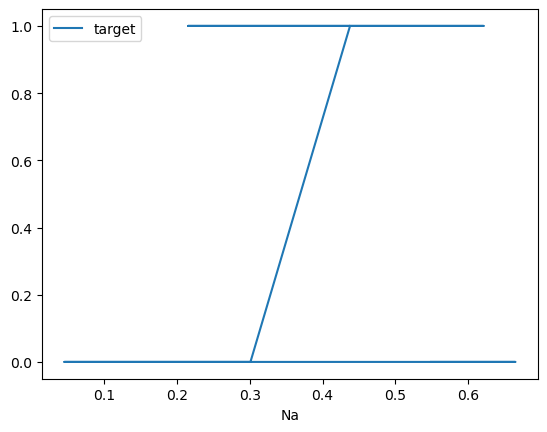

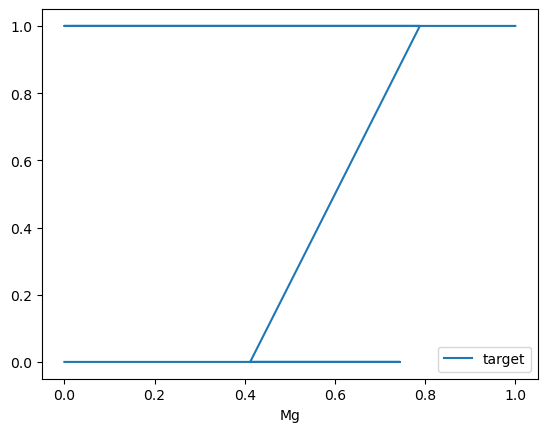

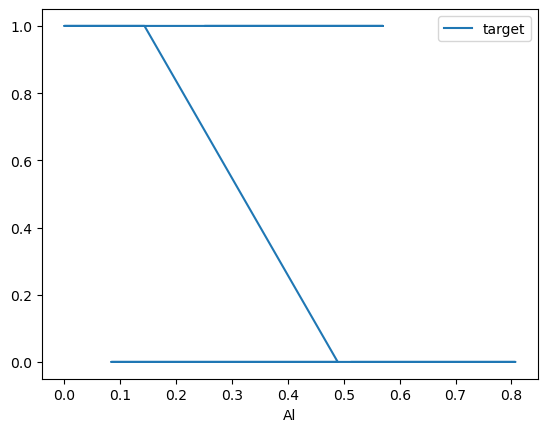

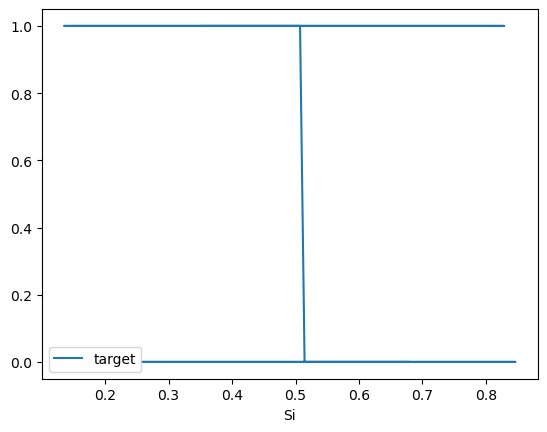

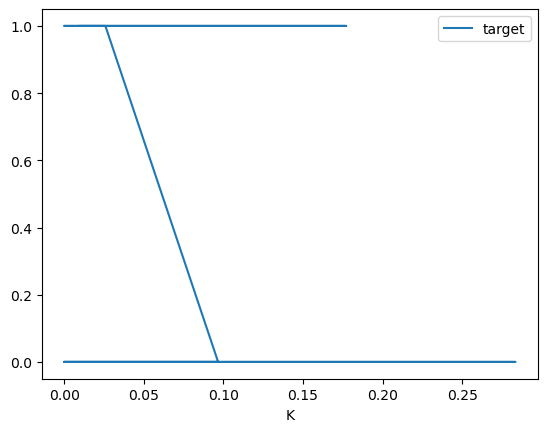

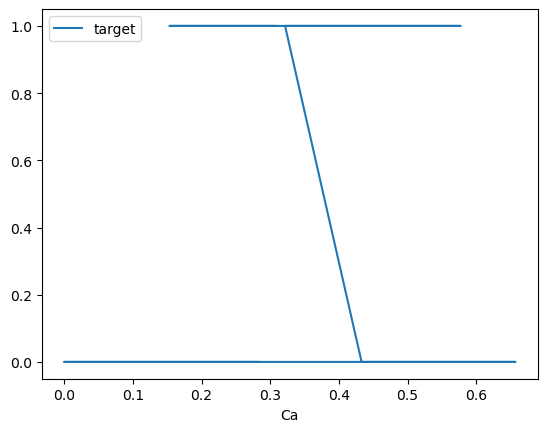

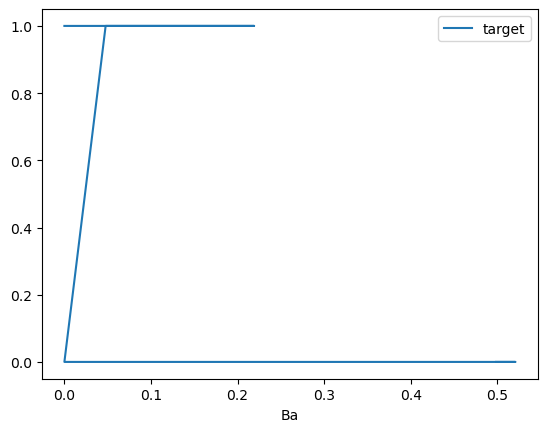

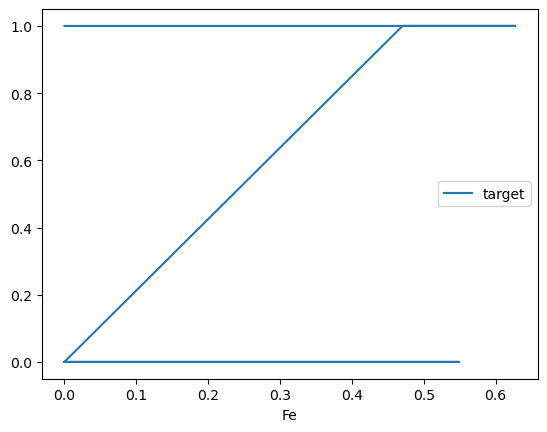

In [34]:
for i in df.columns:
    if i != 'target':
        df.plot.line(x=i, y='target')
        plt.show()

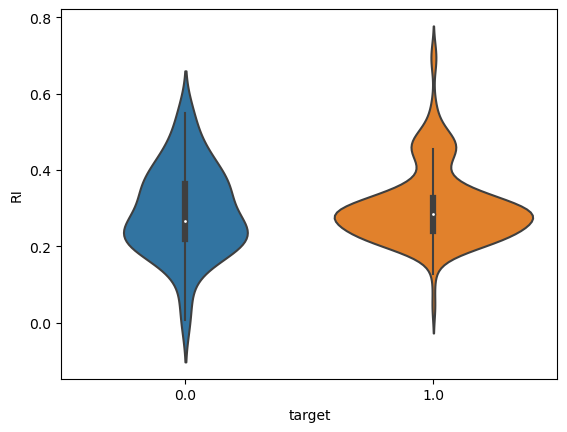

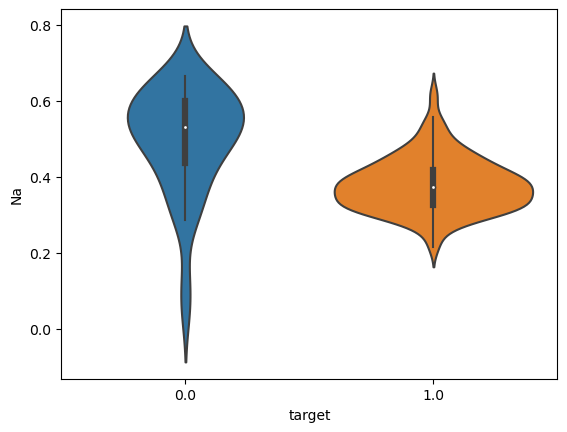

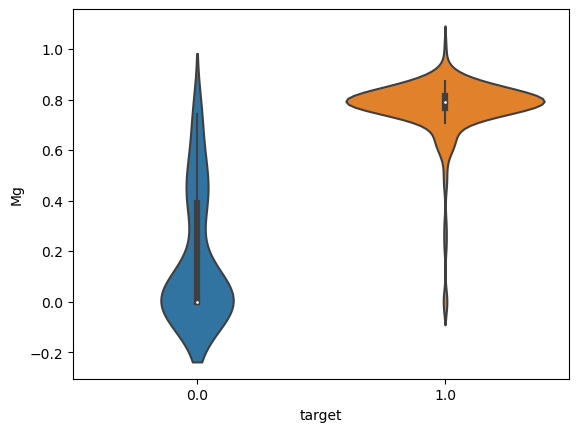

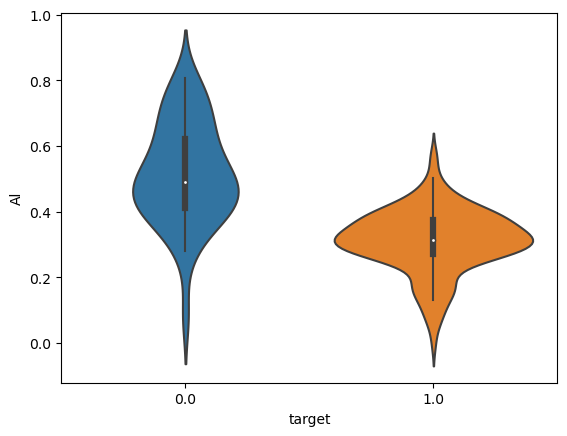

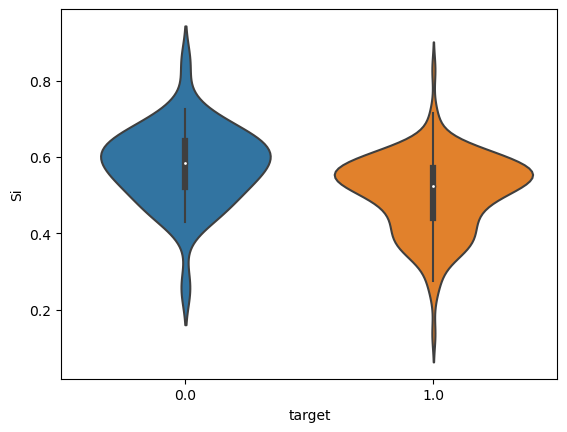

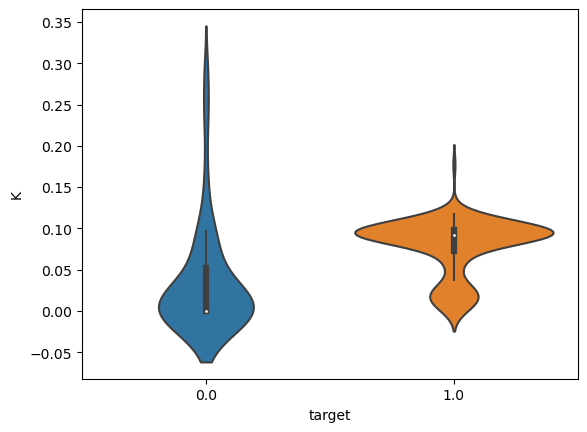

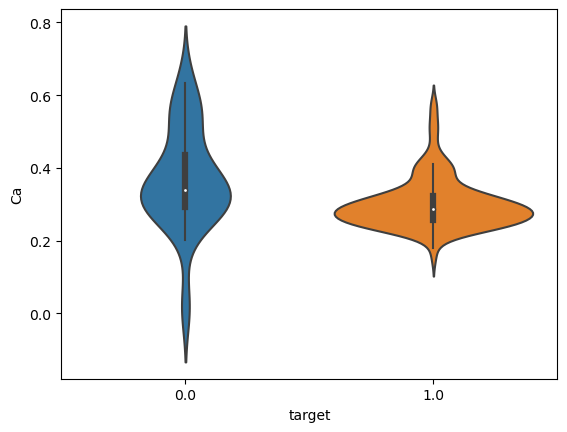

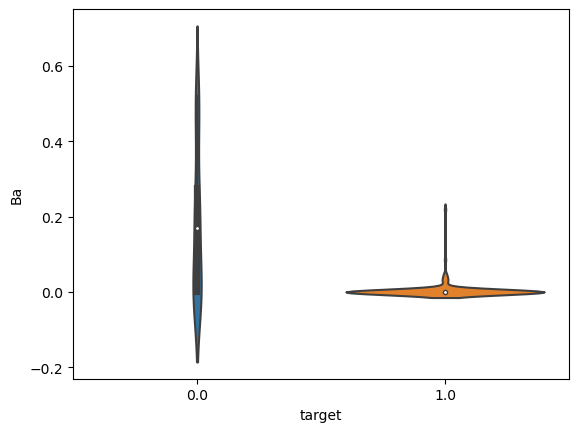

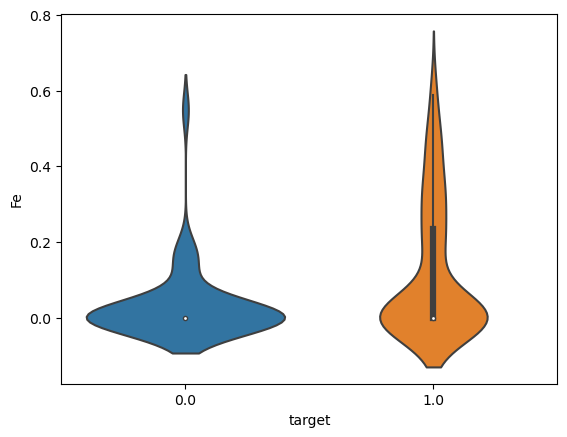

In [35]:
for i in df.columns:
    if i != 'target':
        sns.violinplot(x='target', y=i, data=df)
        plt.show()


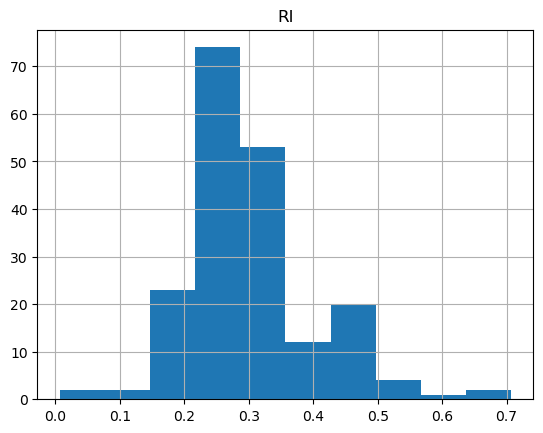

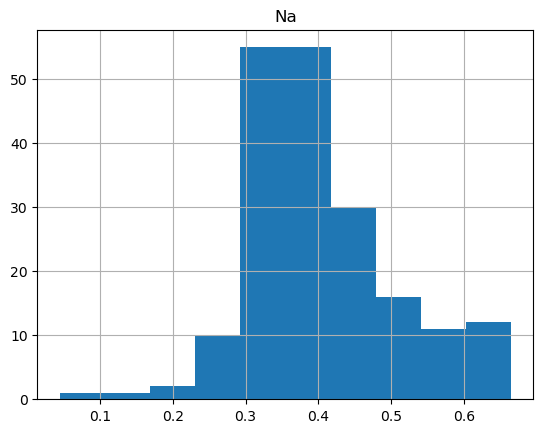

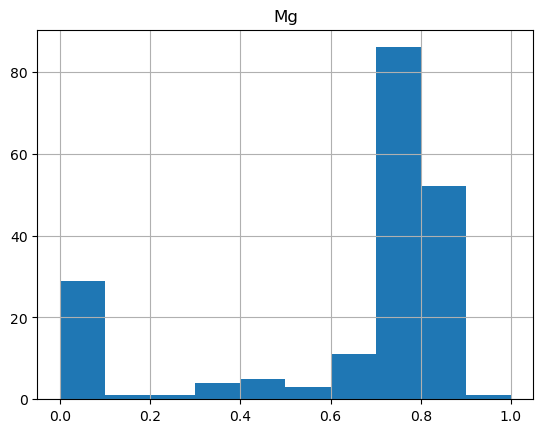

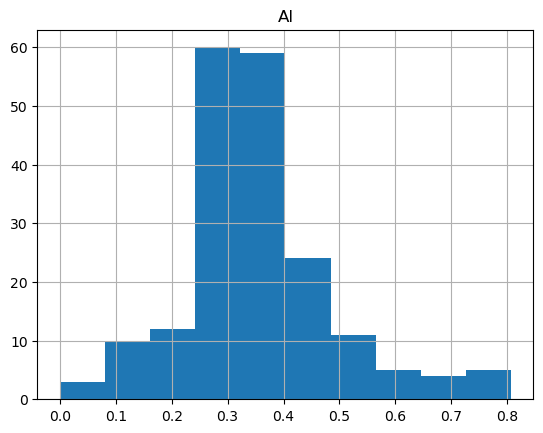

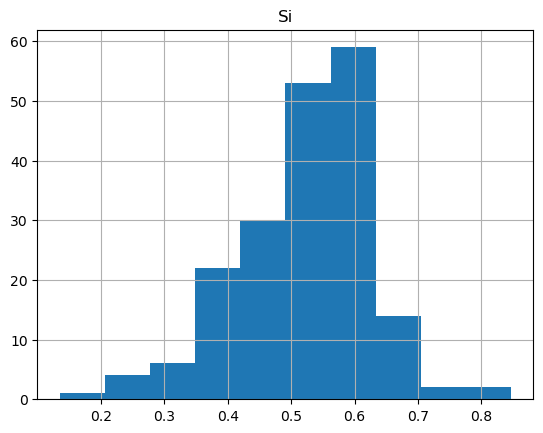

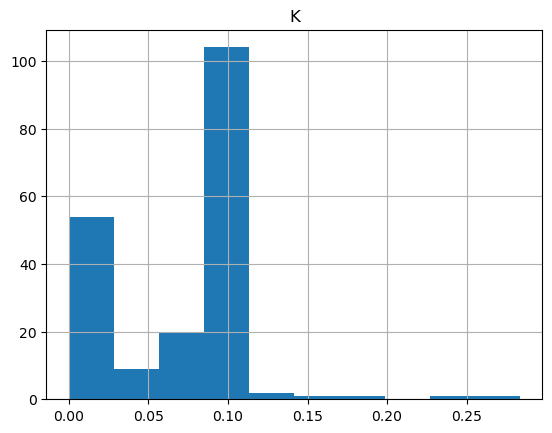

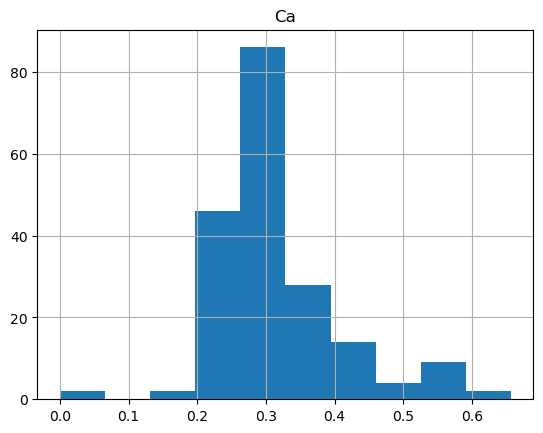

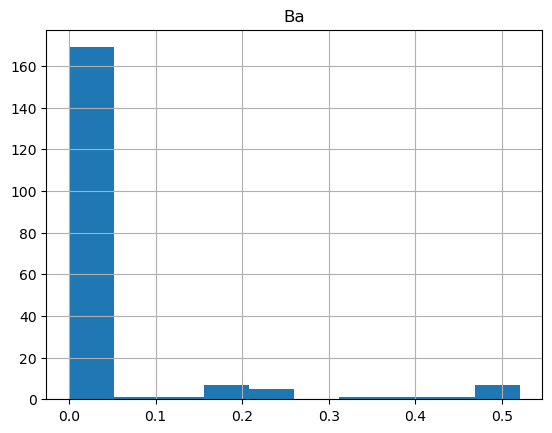

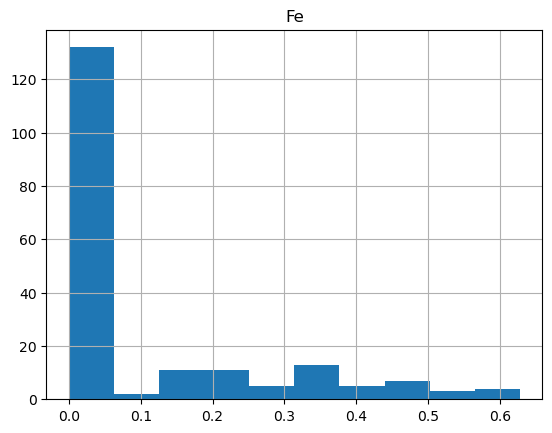

In [36]:
for i in df.columns:
    if df[i].dtype == 'float64' and i != 'target':
        df[i].hist()
        plt.title(i)
        plt.show()

In [37]:
df.var()

RI        0.009977
Na        0.010230
Mg        0.085170
Al        0.018752
Si        0.010813
K         0.002063
Ca        0.008470
Ba        0.012912
Fe        0.028385
target    0.165155
dtype: float64

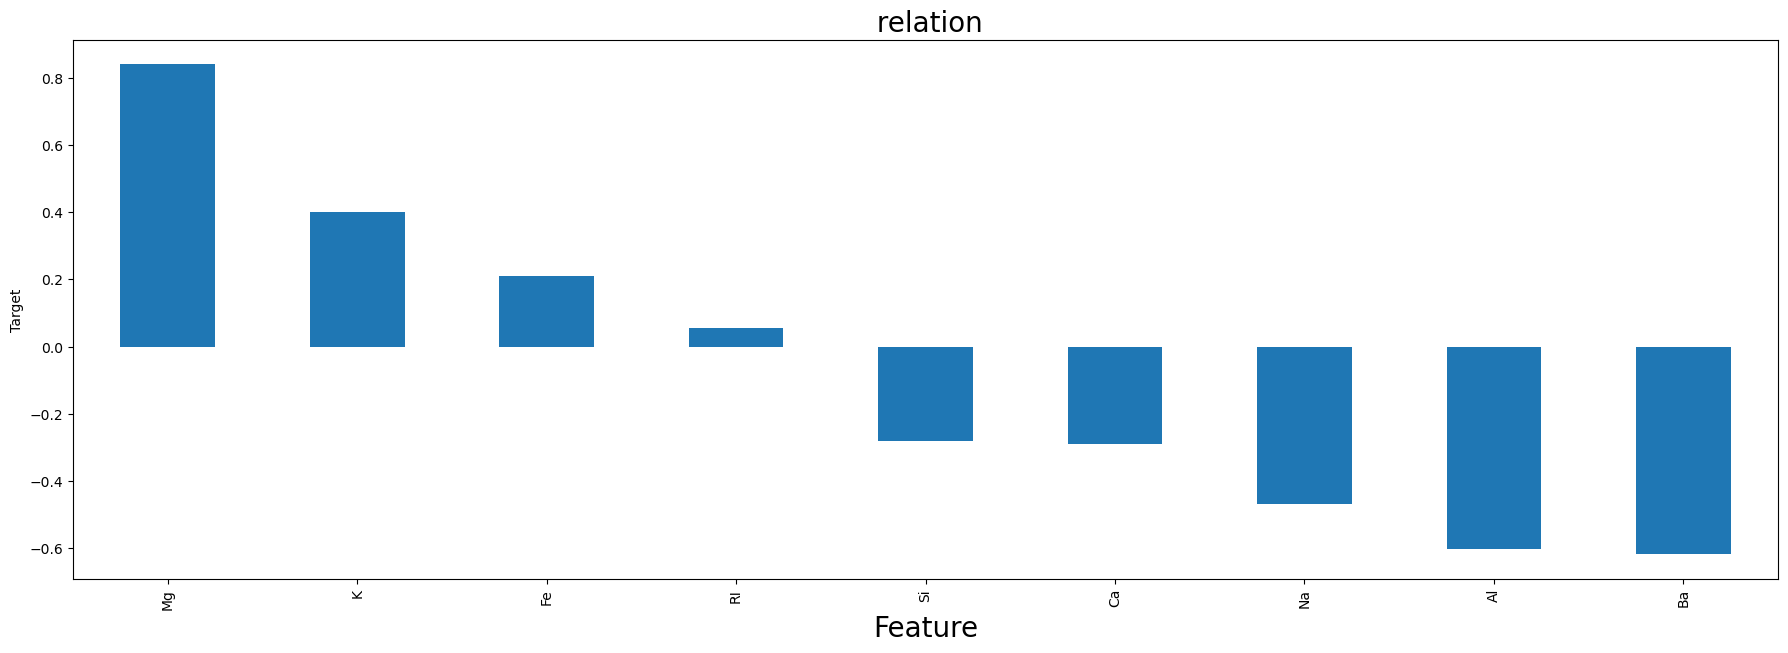

In [38]:
plt.figure(figsize=(22,7))
df.corr()['target'].sort_values(ascending=False).drop(['target']).plot(kind='bar')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

RI
0.9646981616111289


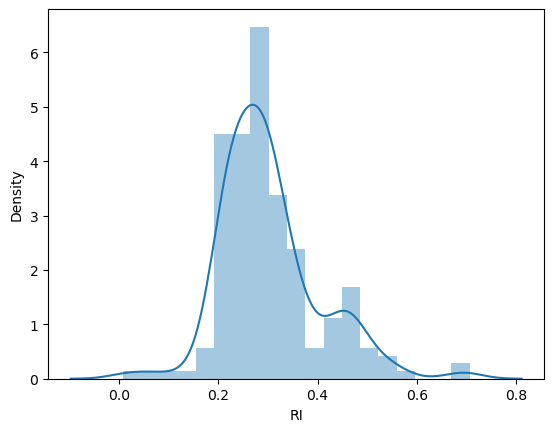

Na
0.3814893336957325


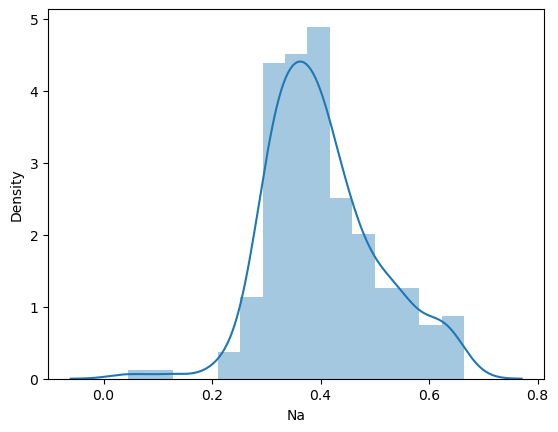

Mg
-1.5099542235185723


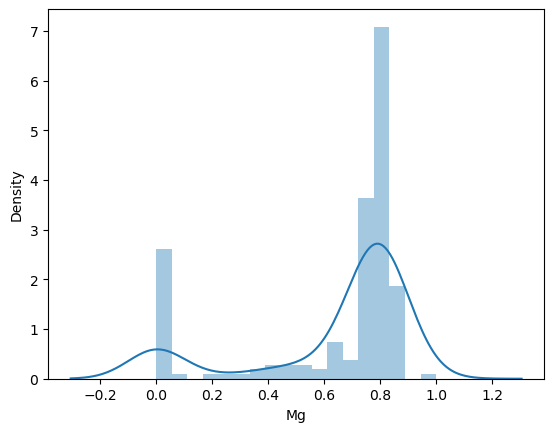

Al
0.6950428504855695


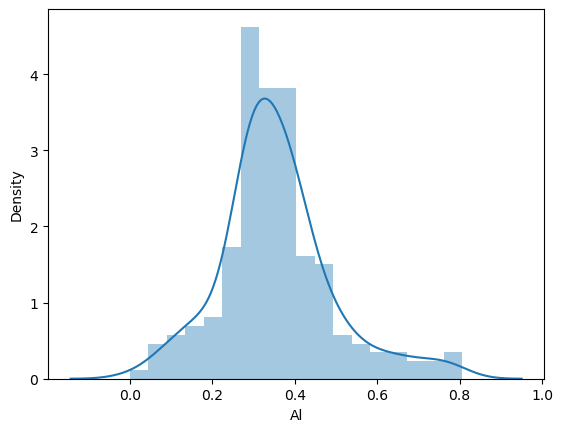

Si
-0.4326305816684167


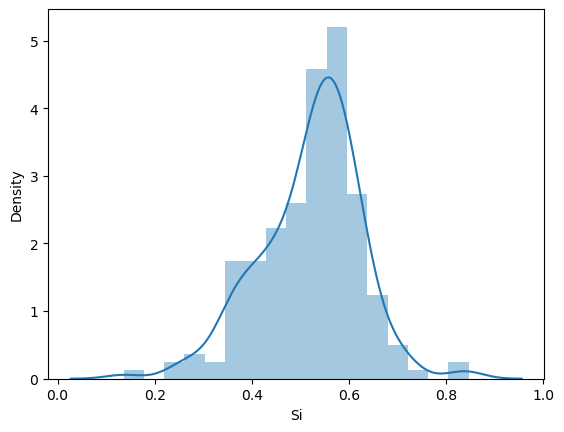

K
0.2930864900131555


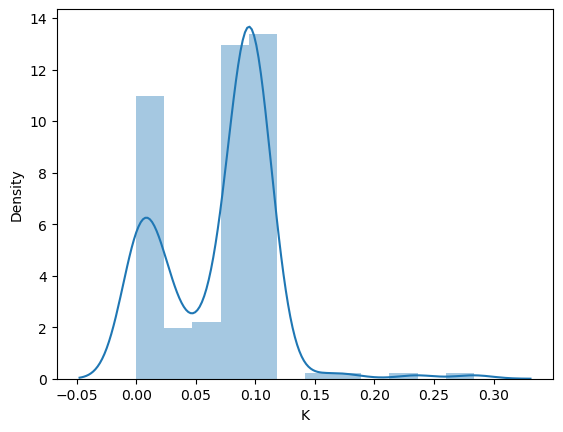

Ca
1.0811030232334262


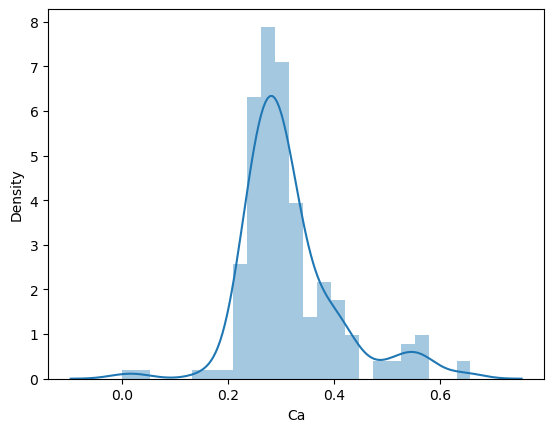

Ba
3.1535013155379827


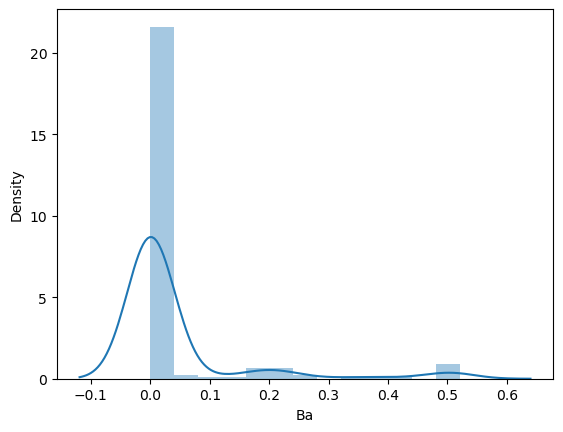

Fe
1.4670942674258618


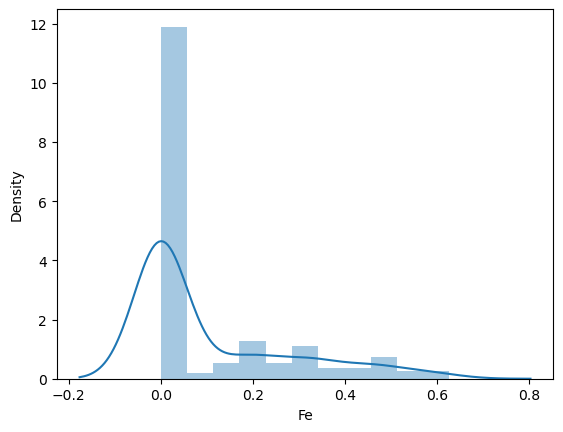

target
-1.4444507289958812


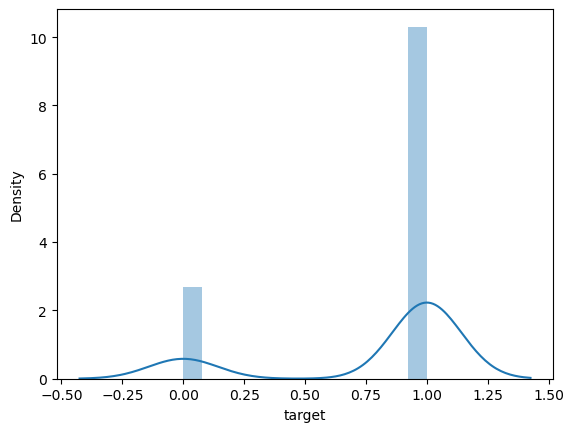

In [39]:
from scipy.stats import skew
for i in df:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    plt.show()

In [40]:
df['Ba']=np.sqrt(df['Ba'])

In [41]:
skew(df['Ba'])

2.4367569866155816

In [42]:
df['RI']=np.sqrt(df['RI'])

In [43]:
skew(df['RI'])

-0.25483745194760843

In [44]:
df['Al']=np.sqrt(df['Al'])

In [45]:
skew(df['Al'])

-0.5808414419155952

In [46]:
df['Ca']=np.sqrt(df['Ca'])

In [47]:
df['Na']=np.sqrt(df['Na'])

In [48]:
skew(df['Ca'])

-0.9739131788588629

In [49]:
df.skew()

RI       -0.256838
Na       -0.434471
Mg       -1.521807
Al       -0.585401
Si       -0.436027
K         0.295387
Ca       -0.981558
Ba        2.455886
Fe        1.478611
target   -1.455790
dtype: float64

# machine learning

In [50]:
x=df.drop('target',axis=1)
y=df['target']

In [51]:
from sklearn.preprocessing import StandardScaler
x = x.apply(pd.to_numeric, errors='coerce')
x = x.astype(float)
x.fillna(x.mean(), inplace=True)

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,4.577013,RI
1,7.718138,Na
2,17.975659,Mg
3,3.061522,Al
4,5.246681,Si
5,5.760960,K
6,17.216734,Ca
7,5.349299,Ba
8,1.079396,Fe


In [53]:
y.value_counts()

target
1.0    153
0.0     40
Name: count, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [55]:
y1.value_counts()

target
1.0    153
0.0    153
Name: count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [58]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [59]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.])

In [60]:
value.score(x_train,y_train)

1.0

In [61]:
value.score(x_test,y_test)

0.9487179487179487

In [62]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acc[key]=accuracy_score(y_test, value)
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
    'Accuracy':acc,
})

print("\n details for each model:")
print(details)

best_model =max(acc, key=acc.get) and  min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


 details for each model:
          MAE       MSE  R-squared      RMSE  Accuracy
dt   0.000000  0.000000   1.000000  0.000000  1.000000
rf   0.051282  0.051282   0.651786  0.226455  0.948718
lgR  0.102564  0.102564   0.303571  0.320256  0.897436
nb   0.025641  0.025641   0.825893  0.160128  0.974359
svm  0.051282  0.051282   0.651786  0.226455  0.948718
knn  0.051282  0.051282   0.651786  0.226455  0.948718
bg   0.025641  0.025641   0.825893  0.160128  0.974359
etc  0.025641  0.025641   0.825893  0.160128  0.974359
gb   0.051282  0.051282   0.651786  0.226455  0.948718

Best Model based on RMSE: dt


In [63]:
cvs = {}
diff = {}

for key, value in model.items():
    value.fit(x1, y1)
    y_pred = value.predict(x_test)

    cvs[key] = cross_val_score(value, x1, y1, cv=5).mean()
    diff[key] = accuracy_score(y_test, y_pred) - cvs[key]

print("Cross-Validation Scores:")
print(cvs)
print("Difference between Accuracy and Cross-Validation Mean:")
print(diff)

Cross-Validation Scores:
{'dt': 0.9476996298254893, 'rf': 0.9672659968270757, 'lgR': 0.9575885774722369, 'nb': 0.9411422527763088, 'svm': 0.96409307244844, 'knn': 0.9803807509254362, 'bg': 0.9542041248016921, 'etc': 0.9771549444738235, 'gb': 0.9640930724484399}
Difference between Accuracy and Cross-Validation Mean:
{'dt': 0.052300370174510724, 'rf': 0.0327340031729243, 'lgR': 0.016770396886737426, 'nb': 0.03321672158266553, 'svm': 0.010265901910534336, 'knn': -0.006021776566461856, 'bg': 0.045795875198307856, 'etc': 0.02284505552617655, 'gb': 0.03590692755156011}


In [64]:
final_model = GradientBoostingClassifier()
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 94.87%


In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86         7
         1.0       0.97      0.97      0.97        32

    accuracy                           0.95        39
   macro avg       0.91      0.91      0.91        39
weighted avg       0.95      0.95      0.95        39



In [66]:
print(confusion_matrix(y_test,y_pred))

[[ 6  1]
 [ 1 31]]


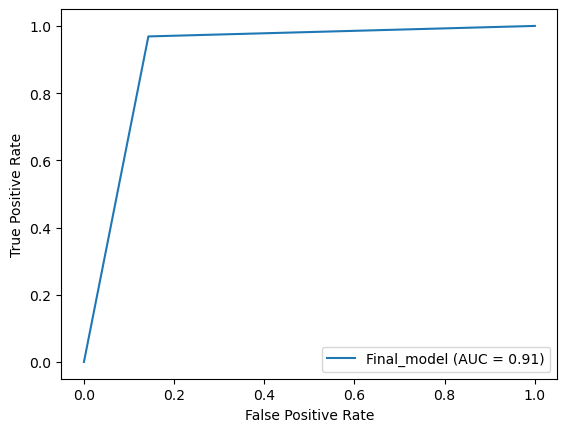

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")

roc_display.plot()
plt.show()

In [68]:
prediction=final_model.predict(x_test) 
prediction

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.])

In [69]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df.head()

,Predicted,Original
0,1.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0


In [70]:
x.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.25814,0.387686,1.235597,-0.663515,-1.627964,-1.326595,0.008912,-0.398659,-0.605187


In [71]:
print('glass type is ',model['gb'].predict(scaler.transform([[1.25814,0.387686,1.235597,-0.663515,-1.627964,-1.326595,0.008912,-0.398659,-0.605187]])))

glass type is  [1.]


In [72]:
y.head(1)

0    1.0
Name: target, dtype: float64

In [74]:
x.tail(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
192,-0.621918,1.361458,-2.199867,1.105438,1.522787,-1.539867,-0.25867,3.432106,-0.605187


In [75]:
y.tail(1)

211    0.0
Name: target, dtype: float64

In [79]:
print('glass type ',model['gb'].predict(scaler.transform([[-0.621918,1.361458,-2.199867,1.105438,1.522787,-1.539867,-0.25867,3.432106,-0.605187]])))

glass type  [0.]


# user own values input

In [82]:
predictions = {}
RI = float(input("Enter the value for RI: "))
Na = float(input("Enter the value for Na: "))
Mg = float(input("Enter the value for Mg: "))
Al = float(input("Enter the value for Al: "))
Si = float(input("Enter the value for Si: "))
K = float(input("Enter the value for K: "))
Ca = float(input("Enter the value for Ca: "))
Ba = float(input("Enter the value for Ba: "))
Fe = float(input("Enter the value for Fe: "))

user_input = [[RI,Na,Mg,Al,Si,K,Ca,Ba,Fe]]
scaled_input = scaler.transform(user_input)
prediction = model['gb'].predict(scaled_input)

print('type of glass:', prediction[0])

Enter the value for RI: -.96
Enter the value for Na: -.67
Enter the value for Mg: .34
Enter the value for Al: .264
Enter the value for Si: .971
Enter the value for K: -.931
Enter the value for Ca: 2.95
Enter the value for Ba: -.332
Enter the value for Fe: -1.626
type of glass: 1.0


In [83]:
predictions = {}
RI = float(input("Enter the value for RI: "))
Na = float(input("Enter the value for Na: "))
Mg = float(input("Enter the value for Mg: "))
Al = float(input("Enter the value for Al: "))
Si = float(input("Enter the value for Si: "))
K = float(input("Enter the value for K: "))
Ca = float(input("Enter the value for Ca: "))
Ba = float(input("Enter the value for Ba: "))
Fe = float(input("Enter the value for Fe: "))

user_input = [[RI,Na,Mg,Al,Si,K,Ca,Ba,Fe]]
scaled_input = scaler.transform(user_input)
prediction = model['gb'].predict(scaled_input)

print('type of glass :', prediction[0])

Enter the value for RI: -.645
Enter the value for Na: .235
Enter the value for Mg: -.264
Enter the value for Al: 6.4
Enter the value for Si: -7.316
Enter the value for K: 3.62
Enter the value for Ca: -.22
Enter the value for Ba: 1.975
Enter the value for Fe: .931
type of glass : 0.0
